In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# from google.colab import drive
# drive.mount('/content/drive', readonly=True)

## Read in Data

In [3]:
url = "https://ddc-datascience.s3.amazonaws.com/boston.csv"
boston = pd.read_csv( url, index_col = 0 )


In [4]:
boston.head()


,per_cap_crime,res_zoning_prop,business_prop,river_front,nitric_oxide_conc,num_rooms,units_before_1940,distance_to_employment,distance_to_hwy,prop_tax,pupil_teacher_ratio,perc_lower_status,med_home_value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [5]:
boston.shape


(490, 13)

In [6]:
boston.info()


<class 'pandas.core.frame.DataFrame'>
Index: 490 entries, 0 to 505
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   per_cap_crime           490 non-null    float64
 1   res_zoning_prop         490 non-null    float64
 2   business_prop           490 non-null    float64
 3   river_front             490 non-null    float64
 4   nitric_oxide_conc       490 non-null    float64
 5   num_rooms               490 non-null    float64
 6   units_before_1940       490 non-null    float64
 7   distance_to_employment  490 non-null    float64
 8   distance_to_hwy         490 non-null    float64
 9   prop_tax                490 non-null    float64
 10  pupil_teacher_ratio     490 non-null    float64
 11  perc_lower_status       490 non-null    float64
 12  med_home_value          490 non-null    float64
dtypes: float64(13)
memory usage: 53.6 KB


In [7]:
boston.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
per_cap_crime,490.0,3.643241,8.722154,0.00632,0.082045,0.24751,3.647423,88.9762
res_zoning_prop,490.0,11.112245,22.844626,0.00000,0.000000,0.00000,12.500000,100.0000
business_prop,490.0,11.113143,6.821302,0.74000,5.190000,9.69000,18.100000,27.7400
river_front,490.0,0.059184,0.236209,0.00000,0.000000,0.00000,0.000000,1.0000
nitric_oxide_conc,490.0,0.554307,0.116688,0.38500,0.449000,0.53800,0.624000,0.8710
num_rooms,490.0,6.245471,0.653147,3.56100,5.881000,6.18500,6.578000,8.7800
units_before_1940,490.0,68.278980,28.164790,2.90000,44.550000,76.80000,93.875000,100.0000
distance_to_employment,490.0,3.834519,2.109948,1.13700,2.111050,3.27590,5.214600,12.1265
distance_to_hwy,490.0,9.514286,8.691297,1.00000,4.000000,5.00000,24.000000,24.0000
prop_tax,490.0,408.002041,168.065190,187.00000,280.250000,330.00000,666.000000,711.0000


In [8]:
boston.isnull().sum()*100


per_cap_crime             0
res_zoning_prop           0
business_prop             0
river_front               0
nitric_oxide_conc         0
num_rooms                 0
units_before_1940         0
distance_to_employment    0
distance_to_hwy           0
prop_tax                  0
pupil_teacher_ratio       0
perc_lower_status         0
med_home_value            0
dtype: int64

## Decision Tree Regression

In [9]:
X = boston.drop('med_home_value', axis = 1)
y = boston['med_home_value']

In [10]:
numLoops = 500

rms_error = np.zeros(numLoops)

for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
  model = DecisionTreeRegressor(max_depth=3)         # Arbitrarily choosing max_depth of 3
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  rms_error[idx] = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"CV RMSE: {rms_error.mean().round(2)*1000}")

CV RMSE: 3920.0


How does this compare to the linear regression example? The CV RMSE for the linear regression problem was about $3890.

## How do we choose the tree depth?

In [11]:
max_depths = [1,2,3,4,5,6,7,8,9,10]
rms_depth = np.zeros(len(max_depths))
std_depth = np.zeros(len(max_depths))

numLoops = 500

for n, depth in enumerate(max_depths):
  rms_error = np.zeros(numLoops)

  for idx in range(0,numLoops):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    rms_error[idx] = np.sqrt(mean_squared_error(y_test, y_pred))

  rms_depth[n] = rms_error.mean()
  std_depth[n] = rms_error.std( ddof = 1 )


In [12]:
pd.DataFrame( zip( max_depths, rms_depth, std_depth ) )


,0,1,2
0,1,6.226455,0.438921
1,2,4.684113,0.404720
2,3,3.897660,0.406816
3,4,3.770986,0.422443
4,5,3.740531,0.445657
5,6,3.826002,0.449117
6,7,3.834638,0.436286
7,8,3.889063,0.481981
8,9,3.894810,0.474929
9,10,3.925289,0.440518


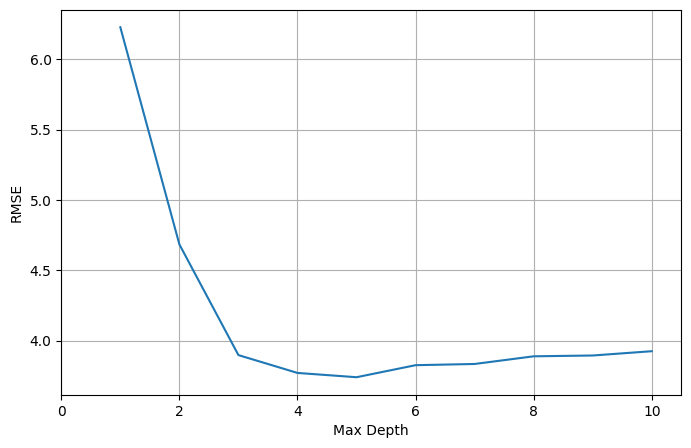

In [13]:
# Plot result
plt.figure(figsize = (8,5))
plt.plot(max_depths, rms_depth)
plt.xlabel('Max Depth')
plt.ylabel('RMSE')
plt.xlim(0, 10.5)
plt.grid()

In [14]:
# Re run with max depth = 4
numLoops = 500

rms_error = np.zeros( numLoops )

for idx in range( 0, numLoops ):
  X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2 )
  model = DecisionTreeRegressor( max_depth=4 )
  model.fit( X_train, y_train )
  y_pred = model.predict( X_test )
  rms_error[idx] = np.sqrt( mean_squared_error( y_test, y_pred ) )

print(f"CV RMSE: {rms_error.mean().round(2)*1000}")

CV RMSE: 3780.0


# Visualize the Decision Tree

In [15]:
import graphviz
from IPython.display import display
from sklearn import tree

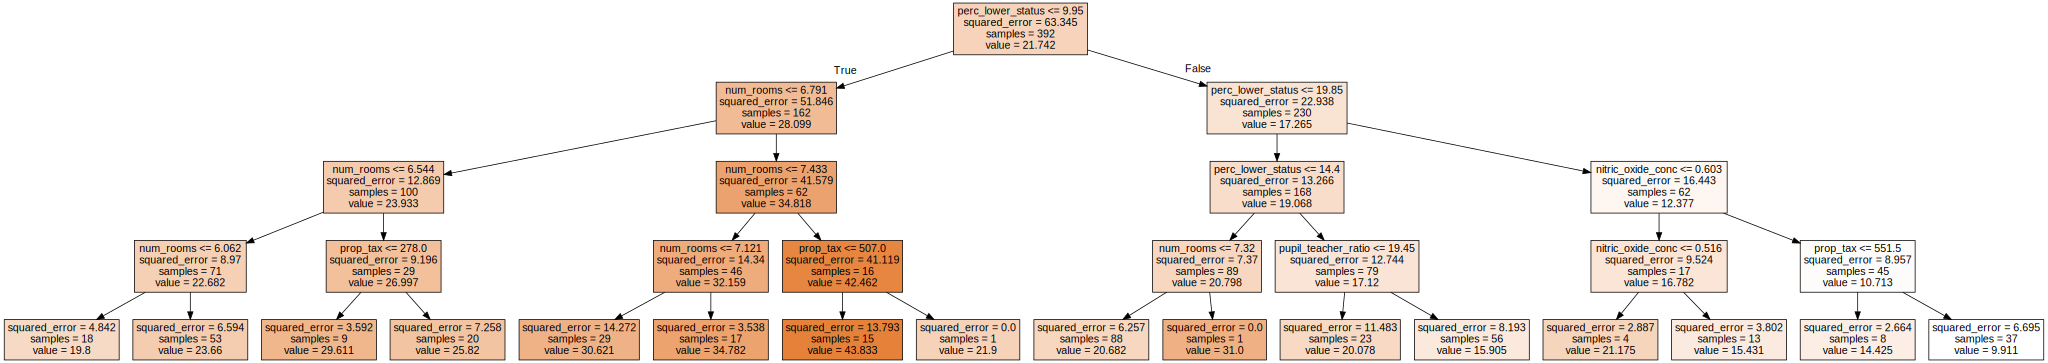

In [16]:
# Option 1
display(
  graphviz.Source(
    tree.export_graphviz(
      model,
      feature_names = X.columns,
      filled = True,
    )
  )
)

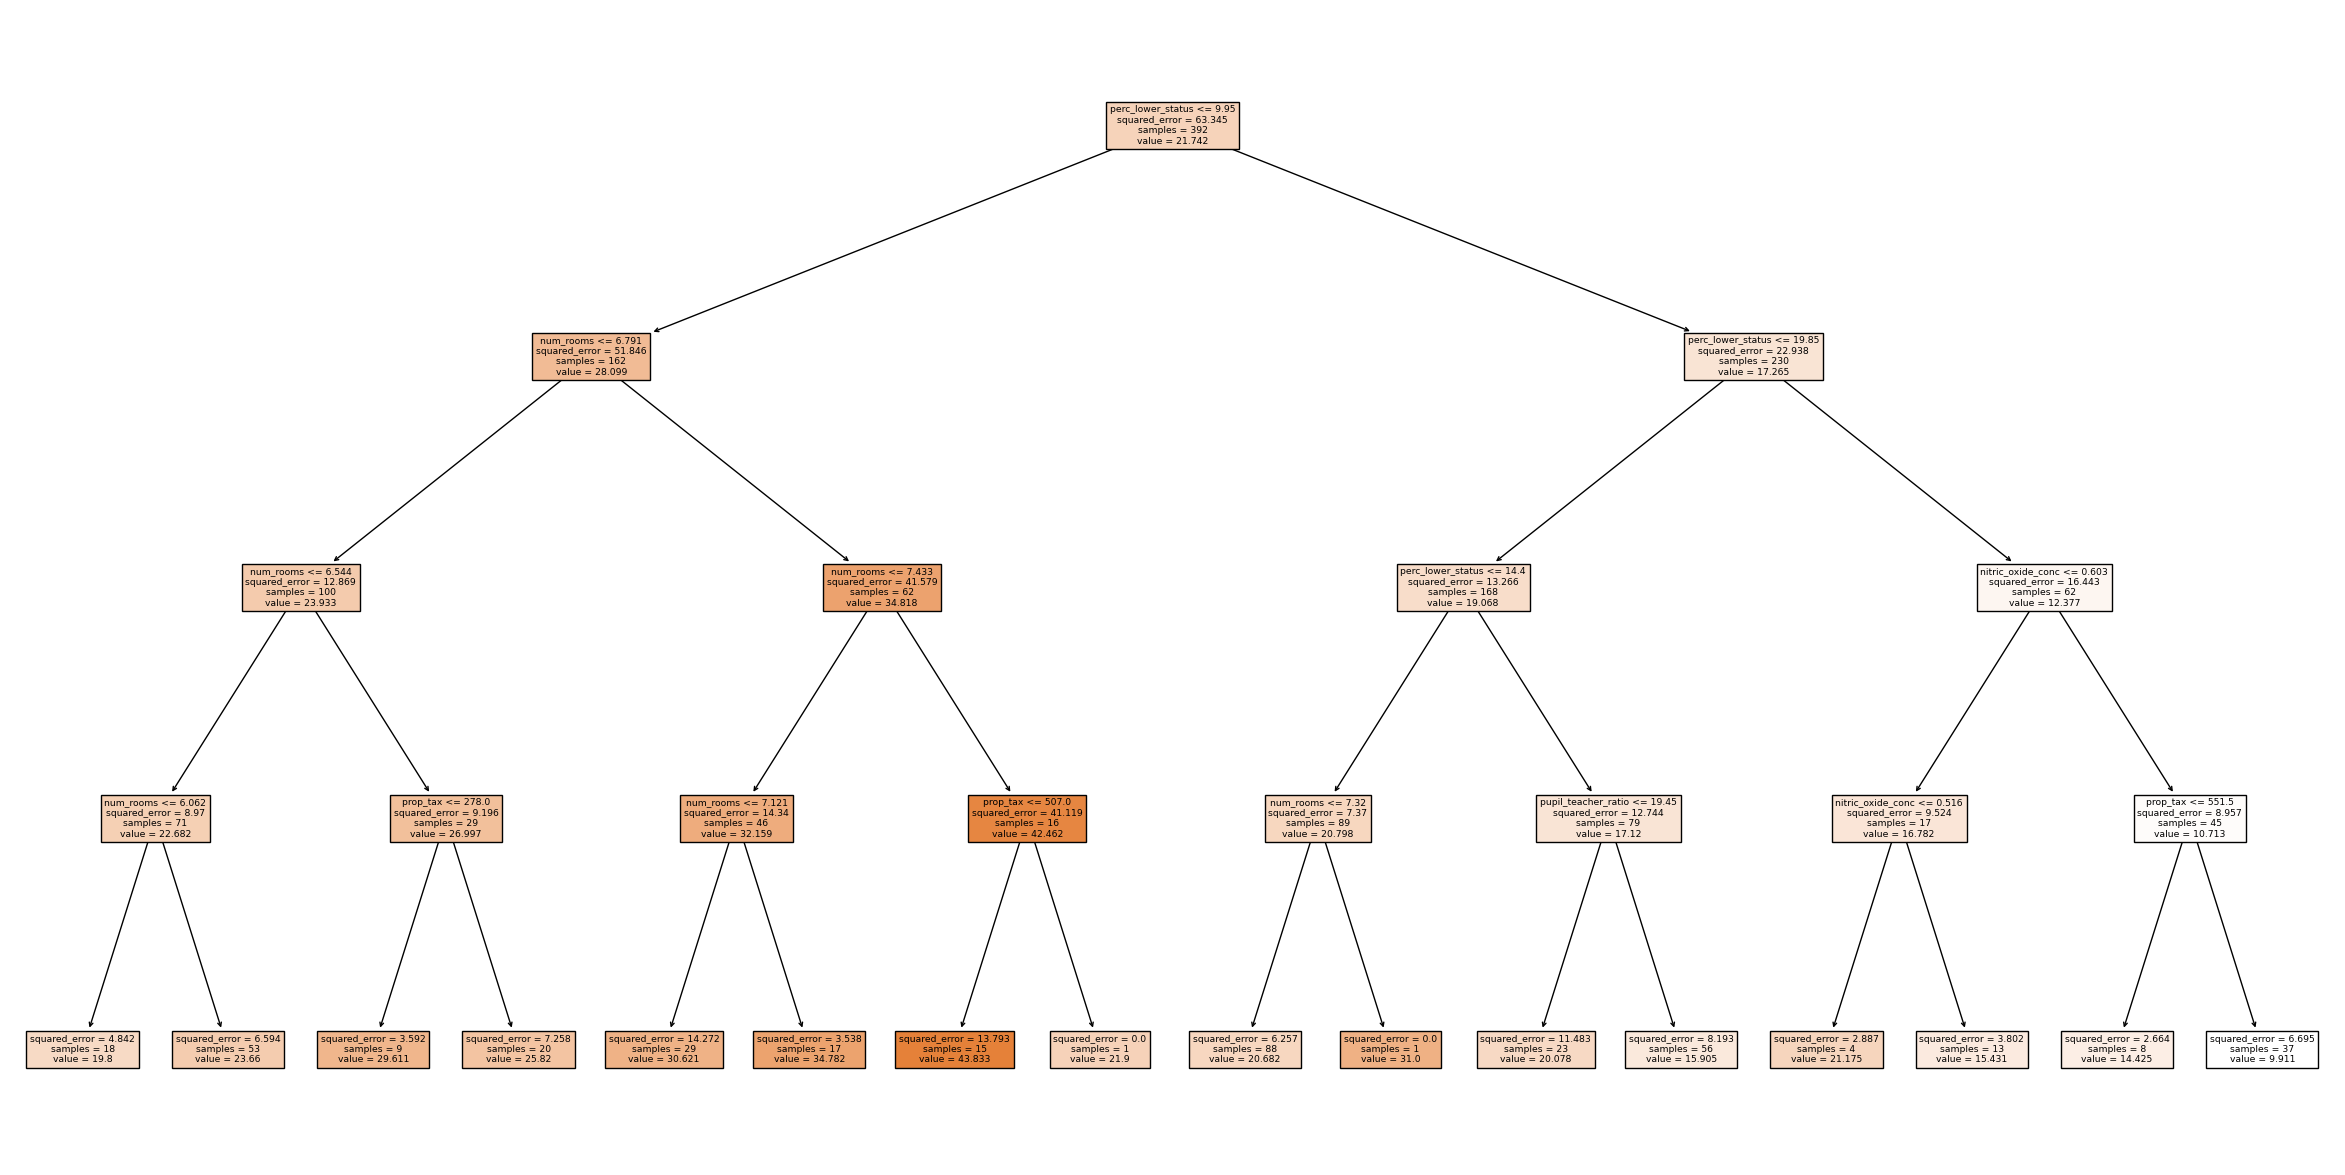

In [17]:
# Option 2
plt.figure(figsize=(30,15))
tree_plot = tree.plot_tree(
  model,
  feature_names = X.columns,
  filled=True,
)